In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Binary image')

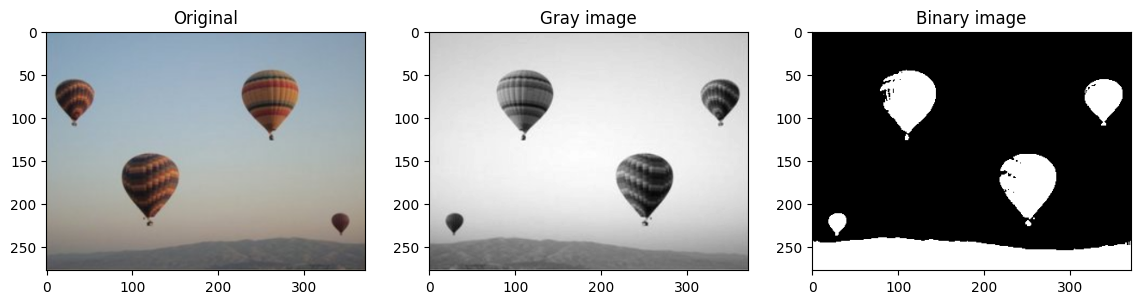

In [4]:
input_image = cv.imread(r"D:\Opencv\class.vision-master\images\balloon.png")

gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(input_image[...,::-1]);plt.title("Original")
plt.subplot(132);plt.imshow(gray_image[...,::-1], cmap='gray');plt.title("Gray image")
plt.subplot(133);plt.imshow(binary_image[...,::-1], cmap='gray');plt.title("Binary image")

Text(0.5, 1.0, 'Contours')

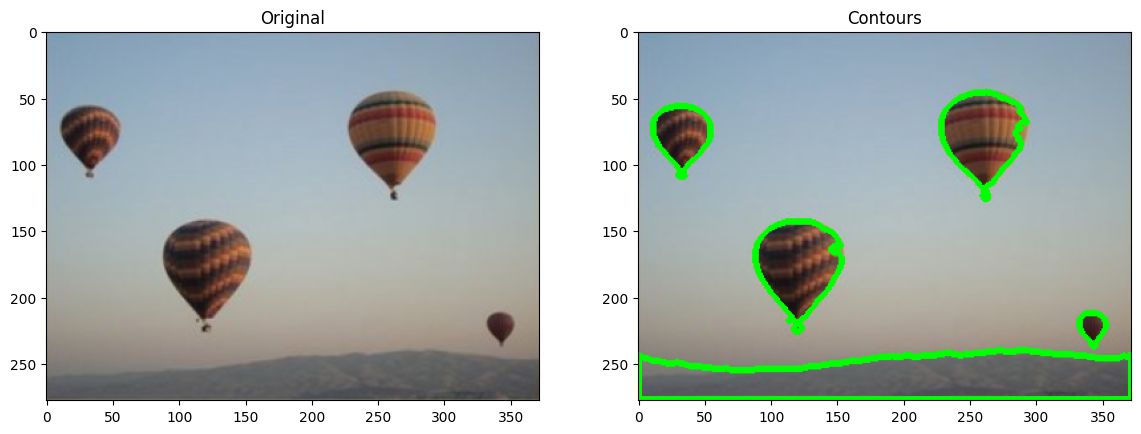

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5), (2,2))
closing = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
all_contours = cv.drawContours(input_image.copy(), contours, -1, (0,255,0), 3)
plt.figure(figsize=[14,8])

plt.subplot(121);plt.imshow(input_image[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(all_contours[...,::-1]);plt.title("Contours")

In [6]:
boundRect = cv.boundingRect(contours[2])
centers, radius = cv.minEnclosingCircle(contours[2])

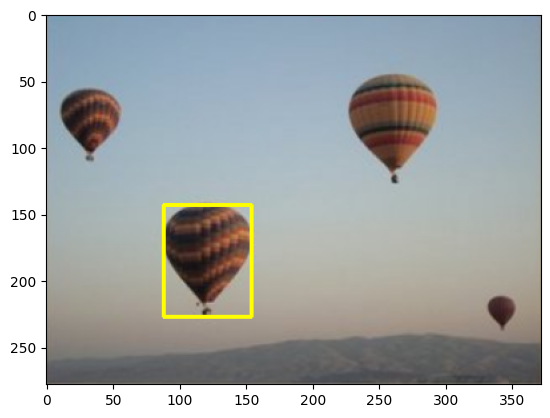

In [7]:
drawing = input_image.copy()

cv.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
    (int(boundRect[0] + boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)

plt.imshow(drawing[...,::-1])

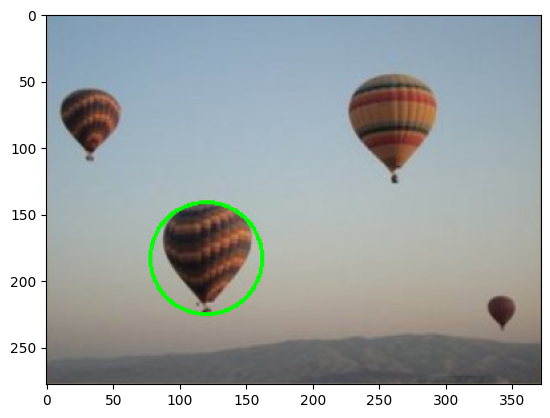

In [9]:
drawing = input_image.copy()
cv.circle(drawing, (int(centers[0]), int(centers[1])), int(radius), (0,255,0), 2)
plt.imshow(drawing[...,::-1])

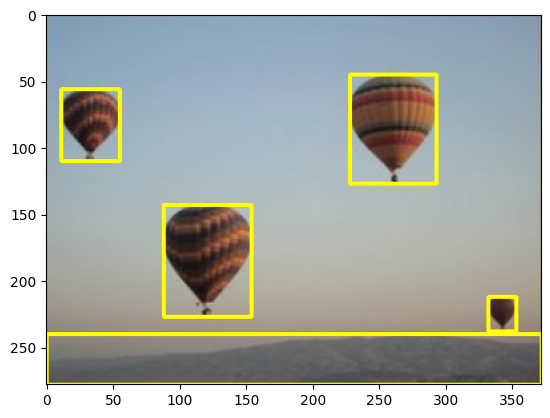

In [11]:
input_image = cv.imread(r"D:\Opencv\class.vision-master\images\balloon.png")

gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY_INV)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5), (2,2))
closing = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

drawing = input_image.copy()

for c in contours:
    boundRect = cv.boundingRect(c)
    cv.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
   (int(boundRect[0] + boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)
plt.imshow(drawing[...,::-1])